In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
dataset = pd.read_csv(url, sep=';')

In [3]:
# Take a look is it ok ;)
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Dividing the types of wines into smaller groups according to quality, in order to improve accuracy
general = []
for i in dataset['quality']:
    if i >= 1 and i <= 3:
        general.append('1')
    elif i >= 4 and i <= 7:
        general.append('2')
    elif i >= 8 and i <= 10:
        general.append('3')
dataset['General'] = general

dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,General
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2


In [5]:
# Splitting the dataset and preprocessing
from sklearn.model_selection import train_test_split

X = dataset.iloc[:, 0:-2].values
y = dataset.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [6]:
# Splitting the dataset and preprocessing

#from sklearn.model_selection import train_test_split

#X = dataset.drop(['quality'], axis = 1)
#y = dataset['quality']

#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [7]:
# Standard scalar normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Applying PCA

In [8]:
# Applying PCA
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.99)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [9]:
# Variance caused by each of the principal components
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.28168313 0.16996085 0.14418778 0.11325192 0.08778186 0.05996619
 0.05297164 0.0382468  0.03033371 0.01617639]


### Confusion Matrix Function

In [10]:
# Confusion Matrix Function for future predictions
from sklearn.metrics import confusion_matrix

# Getting dataframe labels
from sklearn.utils.multiclass import unique_labels
unique_labels(y_test)

# Combine these labels with the confusion matrix 
def plot(y_true, y_pred):
  labels = unique_labels(y_test)
  column = [f'Predicted {label}' for label in labels]
  indices = [f'Actual {label}' for label in labels]
  table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                       columns=column, index=indices)
  
  return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')


## Decision Trees

<AxesSubplot:>

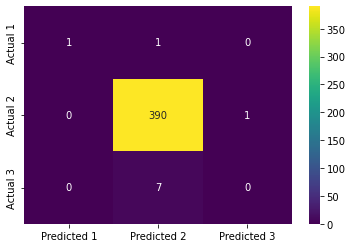

In [11]:
# Decision Trees
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

# Fitting the Decision Trees model
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

plot(y_test, y_pred_dtc)

In [19]:
# Printing classification report
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           1       1.00      0.50      0.67         2
           2       0.98      1.00      0.99       391
           3       0.00      0.00      0.00         7

    accuracy                           0.98       400
   macro avg       0.66      0.50      0.55       400
weighted avg       0.96      0.98      0.97       400



## RandomForestClassifier

<AxesSubplot:>

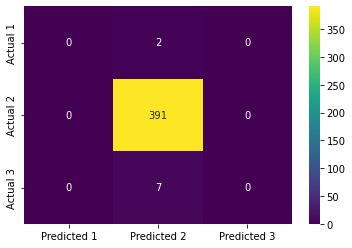

In [13]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=3, random_state=0)

# Fitting the RandomForestClassifier model
rfc.fit(X_train, y_train)

# Predicting the results
y_pred_rfc = rfc.predict(X_test)

plot(y_test, y_pred_rfc) 

In [14]:
# Printing classification report
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.98      1.00      0.99       391
           3       0.00      0.00      0.00         7

    accuracy                           0.98       400
   macro avg       0.33      0.33      0.33       400
weighted avg       0.96      0.98      0.97       400



## k-Nearest Neighbors

<AxesSubplot:>

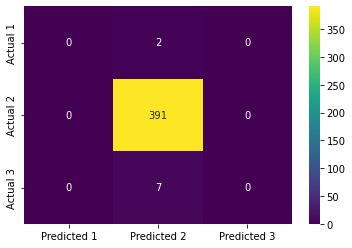

In [15]:
# k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=24)

# Fitting the k-Nearest Neighbors model
knn.fit(X_train, y_train)

# Predicting the results
y_pred_knn = knn.predict(X_test)

plot(y_test, y_pred_knn)

In [16]:
# Printing classification report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.98      1.00      0.99       391
           3       0.00      0.00      0.00         7

    accuracy                           0.98       400
   macro avg       0.33      0.33      0.33       400
weighted avg       0.96      0.98      0.97       400



## Naive Bayes

<AxesSubplot:>

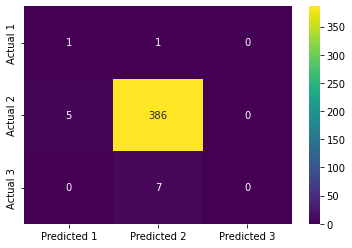

In [17]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

# Fitting the Naive Bayes model
y_pred_gnb = gnb.fit(X_train, y_train).predict(X_test)

plot(y_test, y_pred_gnb)

In [18]:
# Printing classification report
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           1       0.17      0.50      0.25         2
           2       0.98      0.99      0.98       391
           3       0.00      0.00      0.00         7

    accuracy                           0.97       400
   macro avg       0.38      0.50      0.41       400
weighted avg       0.96      0.97      0.96       400

